In [33]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Parametros de la grilla

In [75]:
Lx = 500
Ly = int(Lx*1.4)

grid_size = (Lx, Ly)
# grid_size = np.array([Ly, Lx])


# Carga de datos


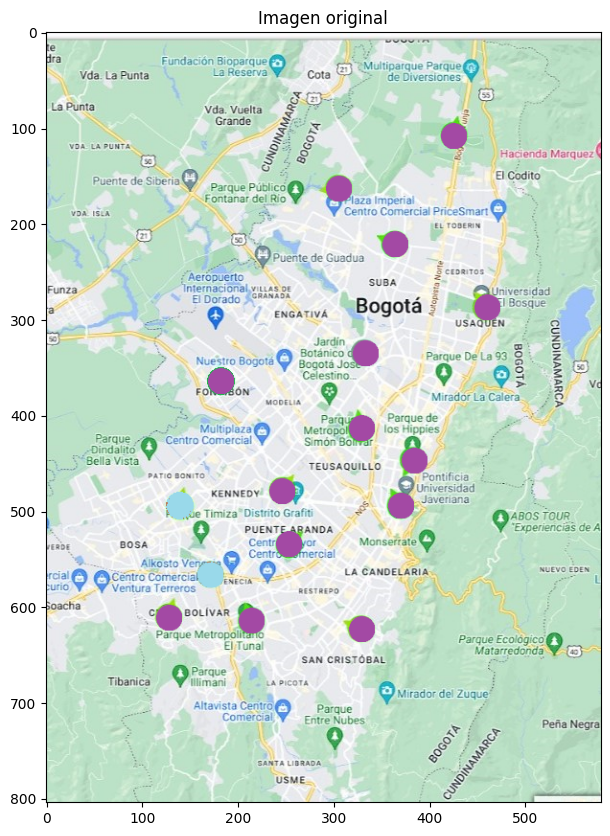

In [76]:
# image_path = '../Mapita.png'
image_path = '../../Data/Map.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

# Lectura de la imagen

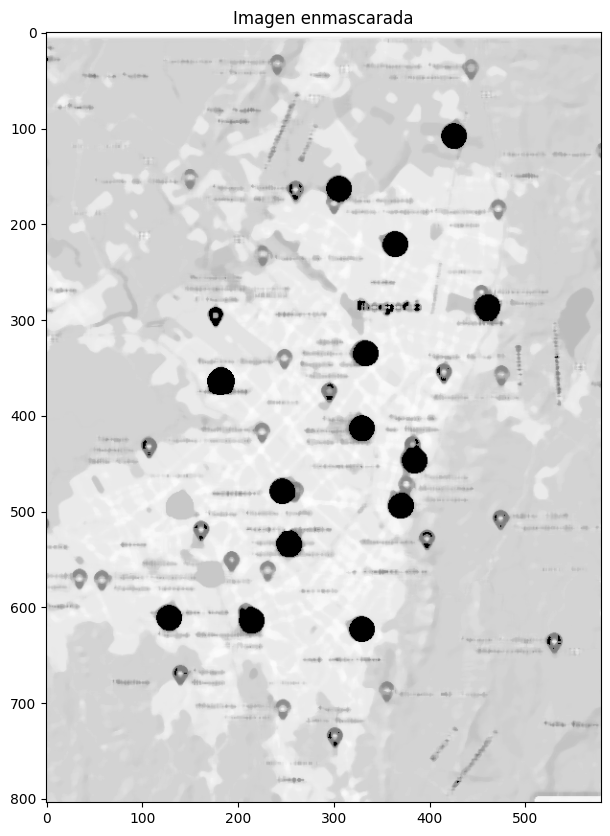

In [77]:

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado para mejorar la detección de círculos
image_blur = cv2.medianBlur(image_gray, 7)

# Definir el rango de valores de gris oscuro
lower_gray = 125
upper_gray = 255

# Crear una máscara para los píxeles oscuros
mask = cv2.inRange(image_blur, lower_gray, upper_gray)

# Aplicar la máscara a la imagen borrosa
masked_image = cv2.bitwise_and(image_blur, image_blur, mask=mask)

# Mostrar la imagen enmascarada
plt.figure(figsize=(10, 10))
plt.imshow(masked_image, cmap='gray')
plt.title('Imagen enmascarada')
plt.show()



# Identificación de coordenadas en la grilla

In [78]:
# Detectar círculos usando la transformada de Hough
circles = cv2.HoughCircles(masked_image, cv2.HOUGH_GRADIENT, dp=1.5, minDist=20,
                           param1=50, param2=30, minRadius=13, maxRadius=21)


# Verificar si se han detectado círculos
if circles is not None:
    print(f'Se detectaron {circles.shape[1]} círculos.')
    
    # Redondear las coordenadas y el radio de los círculos
    circles = np.round(circles[0, :]).astype("int")
    
    # Crear una matriz para almacenar la grilla de posiciones de las estaciones
    height, width, _ = image.shape
    
    #Se crea la matriz de posiciones de las estaciones
    stations_positions = np.zeros(grid_size)

    # Crear una figura para visualizar la imagen y la grilla
    fig, ax = plt.subplots(figsize=(6, 12))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    cell_height = height / grid_size[0]
    cell_width = width / grid_size[1]
    
    # Procesar cada círculo detectado
    for (x, y, r) in circles:
        # Celda en la que se encuentra el círculo
        cell_x = int(x / cell_width)  # Convertir a entero
        cell_y = int((height - y) / cell_height)  # Convertir a entero
        
        # Marcar la celda en la grilla, asegurándose de no exceder los límites
        if 0 <= cell_y < grid_size[0] and 0 <= cell_x < grid_size[1]:
            stations_positions[cell_y, cell_x] = 1

  
    # Colorear la grilla sobre la imagen
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if stations_positions[i, j] == 1:
                rect = patches.Rectangle((j * cell_width, (height - (i + 1) * cell_height)), cell_width, cell_height, linewidth=1, edgecolor='b', facecolor='none', alpha=0.9)
                ax.add_patch(rect)
                # Anotar la posición en la celda
                plt.text(j * cell_width + cell_width / 2, (height - (i + 1) * cell_height) + cell_height / 2, f'({j}, {i})', color='black', fontsize=8, ha='center', va='center', alpha=1)
            else:
                rect = patches.Rectangle((j * cell_width, (height - (i + 1) * cell_height)), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none', alpha=0.2)
                ax.add_patch(rect)
        
    
    # Mostrar la imagen con las posiciones de los círculos y la grilla coloreada
    plt.title('Grilla sobre la imagen con identificación de círculos')
    plt.ylabel('X')
    plt.xlabel('Y')
    plt.show()
    print(f'Numero de estaciones contadas: {len(stations_positions[stations_positions == 1])}')

else:
    print("No se detectaron círculos.")

Se detectaron 16 círculos.


# Relacionación con las estaciones reales

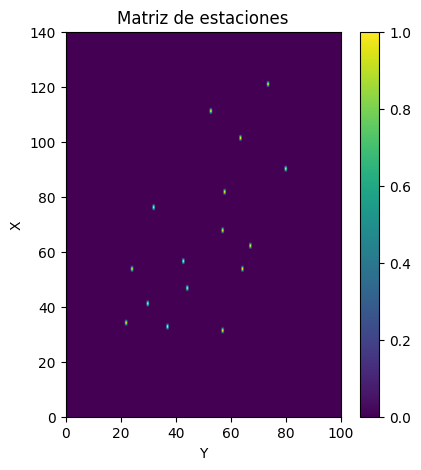

In [60]:
#Matiz de estaciones
plt.figure(figsize=(5,5))
# plt.imshow(stations_positions)
plt.imshow(stations_positions, extent=[0, Lx, 0, Ly], origin='lower')
plt.colorbar()
plt.ylabel('X')
plt.xlabel('Y')
plt.title('Matriz de estaciones')
plt.show()

In [61]:
#Lectura de estaciones
path_data = '../../Data/estaciones.txt'
data_estaciones = pd.read_csv(path_data)
data_estaciones

,Estación,VelViento,DirViento,PM10,Pm2.5
0,Guaymaral,True,True,True,True
1,Suba,True,True,True,True
2,Colina,True,True,True,True
3,Bolivia,False,False,False,True
4,Usaquén,True,True,True,True
5,Las Ferias,True,True,True,True
6,Fontibón,True,True,True,True
7,Estación Movil Fontibón,False,False,True,True
8,Centro de Alto Rendimiento,True,True,True,True
9,Móvil Séptima,True,True,True,True


In [62]:

# Filtrar el dataset por la columna "VelViento" igual a True
data_VelViento = data_estaciones[data_estaciones['VelViento'] == True]
data_VelViento

,Estación,VelViento,DirViento,PM10,Pm2.5
0,Guaymaral,True,True,True,True
1,Suba,True,True,True,True
2,Colina,True,True,True,True
4,Usaquén,True,True,True,True
5,Las Ferias,True,True,True,True
6,Fontibón,True,True,True,True
8,Centro de Alto Rendimiento,True,True,True,True
9,Móvil Séptima,True,True,True,True
10,Kennedy,True,True,True,True
11,Puente Aranda,True,True,True,True


In [66]:
coords_X, coords_Y = [], []
# Estas se recorren en i de izquierda a derecha y en j de arriba hacia abajo ya
# que en el dataset se encuentran las estaciones en orden de arriba hacia abajo 
# y de izquierda a derecha
coords_X, coords_Y = np.where(stations_positions == 1)
coords_X, coords_Y


(array([22, 23, 24, 29, 33, 38, 38, 40, 44, 48, 54, 58, 64, 72, 79, 86],
       dtype=int64),
 array([ 79,  51,  30,  41,  61,  33,  89,  59,  93,  79,  44,  80, 111,
         88,  73, 102], dtype=int64))

In [67]:
# Asignar las coordenadas al DataFrame
data_VelViento['x_cell'] = coords_Y
data_VelViento['y_cell'] = coords_X


# Create a new DataFrame with station names and coordinates
data_estaciones_coords = data_VelViento[['Estación', 'x_cell', 'y_cell']].copy()
data_estaciones_coords.reset_index(drop=True, inplace=True)

# Print the new DataFrame
data_estaciones_coords

C:\Users\cterr\AppData\Local\Temp\ipykernel_8220\1789752546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_VelViento['x_cell'] = coords_Y
C:\Users\cterr\AppData\Local\Temp\ipykernel_8220\1789752546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_VelViento['y_cell'] = coords_X


,Estación,x_cell,y_cell
0,Guaymaral,79,22
1,Suba,51,23
2,Colina,30,24
3,Usaquén,41,29
4,Las Ferias,61,33
5,Fontibón,33,38
6,Centro de Alto Rendimiento,89,38
7,Móvil Séptima,59,40
8,Kennedy,93,44
9,Puente Aranda,79,48


In [68]:
data_VelViento.to_csv('../../Data/estaciones_coord.txt', sep=',', index=False)

In [69]:
def meters_per_pixel(pixel, distance):
    return distance/pixel

def time_per_pixel(distance):
    vel_sound = 343
    c = 1/np.sqrt(3)
    return (distance*c)/vel_sound

In [70]:
cell_height, cell_width

(8.04, 4.135714285714286)

In [71]:
scale = meters_per_pixel(52,2000)
distance_cell = cell_width*scale
print(f'Distancia de las celdas: {distance_cell} m')

Distancia de las celdas: 159.06593406593407 m


In [72]:
time = time_per_pixel(distance_cell)
print(f'El click por celda es de {time} segundos')

El click por celda es de 0.2677456555447998 segundos


In [73]:
print(f'Cantidad de clikcs por hora: {3600/time} clicks/hora')

Cantidad de clikcs por hora: 13445.596316679133 clicks/hora


In [74]:
vel_sound = 343 
c = 1/np.sqrt(3)
vel_cel = (distance_cell*c)/time
vel_sound, vel_cel

(343, 342.99999999999994)